In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')
import itertools

In [2]:
df=pd.read_csv('product h.csv', parse_dates=['Month-Year'], index_col='Month-Year')

In [3]:
df.head(15)

,Product Name,Product Category,Month,Year,Sales,Market Size,Marketing Expense,Month No.
Month-Year,,,,,,,,
2019-01-01,Product H,Anti Biotic Upper Respiratory,January,2019,62686,142038,447509,1
2019-02-01,Product H,Anti Biotic Upper Respiratory,February,2019,74426,168635,531319,2
2019-03-01,Product H,Anti Biotic Upper Respiratory,March,2019,91347,206976,652116,3
2019-04-01,Product H,Anti Biotic Upper Respiratory,April,2019,60600,137309,432617,4
2019-05-01,Product H,Anti Biotic Upper Respiratory,May,2019,37374,84683,266809,5
2019-06-01,Product H,Anti Biotic Upper Respiratory,June,2019,30737,69648,219428,6
2019-07-01,Product H,Anti Biotic Upper Respiratory,July,2019,29683,67255,211904,7
2019-08-01,Product H,Anti Biotic Upper Respiratory,August,2019,34788,78824,248348,8
2019-09-01,Product H,Anti Biotic Upper Respiratory,September,2019,43408,98356,309885,9


In [4]:
sales_h= df.drop(['Product Name','Product Category','Month','Year','Month No.'],axis=1)

In [5]:
sales_h.shape

(60, 3)

In [6]:
sales_h.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2019-01-01 to 2023-12-01
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Sales              60 non-null     int64
 1   Market Size        60 non-null     int64
 2   Marketing Expense  60 non-null     int64
dtypes: int64(3)
memory usage: 1.9 KB


In [7]:
print('Total Sales:', sales_h['Sales'].sum())
print('Total Market Size:',sales_h['Market Size'].sum())
print('Total Marketing Expense:', sales_h['Marketing Expense'].sum())

Total Sales: 4057933
Total Market Size: 7143631
Total Marketing Expense: 12841800


Text(0.5, 1.0, 'Product H')

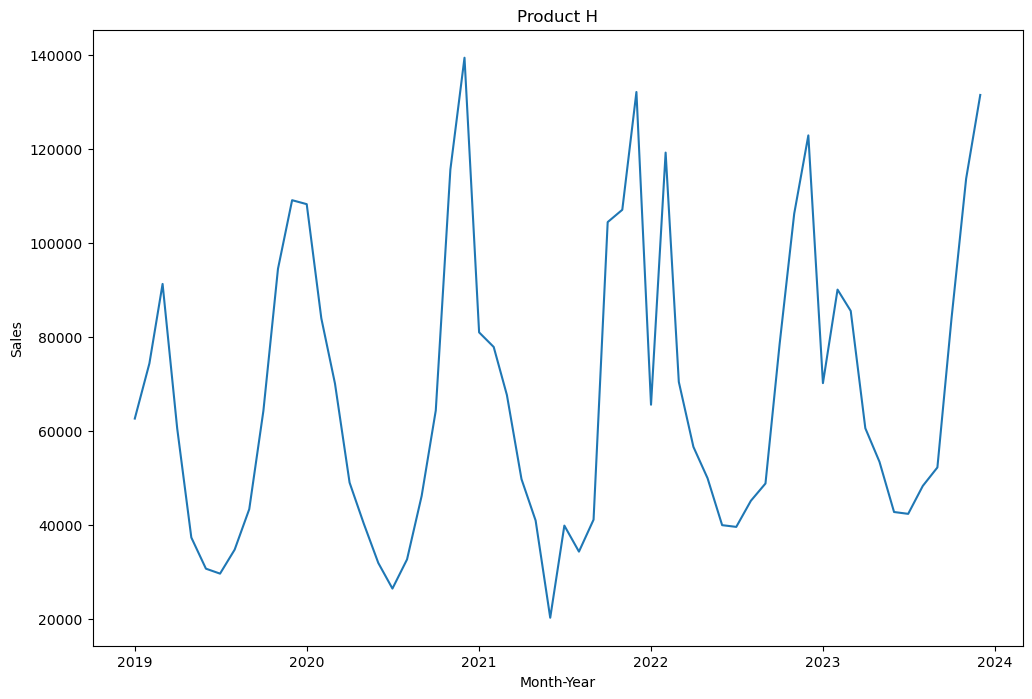

In [8]:
plt.figure(figsize=(12,8))
sns.lineplot(sales_h['Sales'])
plt.title('Product H')

In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [11]:
adf_test(sales_h['Sales'])

ADF Statistics: -1.0256008967536312
p- value: 0.7438128320877682
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [12]:
sales_h_diff= sales_h['Sales'].diff().dropna()

Text(0.5, 1.0, 'Product H - First Difference')

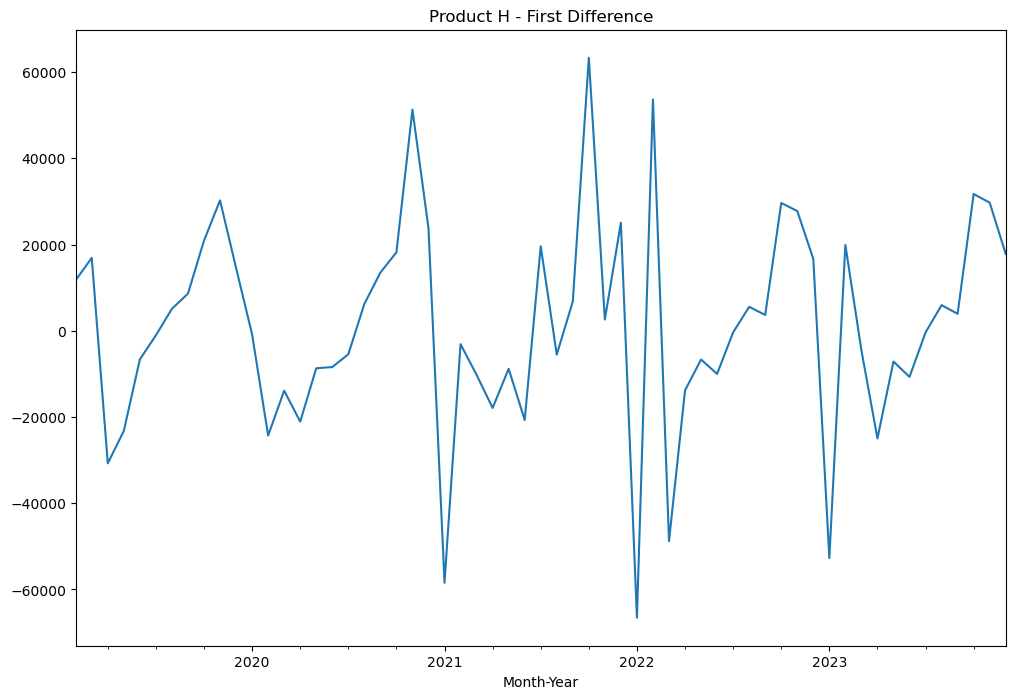

In [13]:
sales_h_diff.plot(figsize=(12,8))
plt.title('Product H - First Difference')

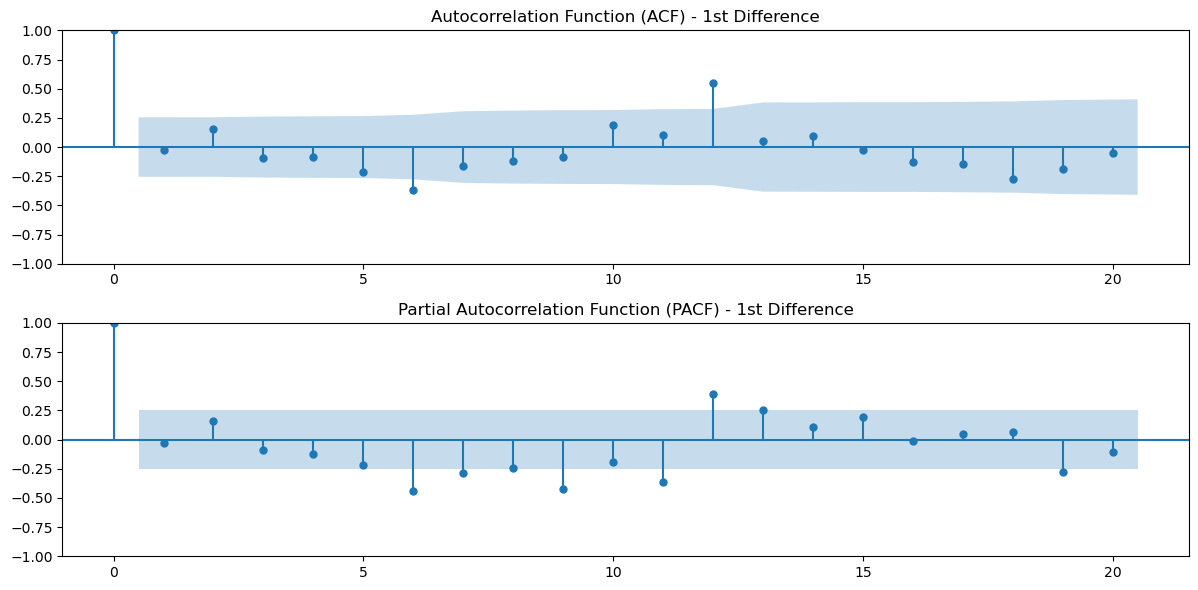

In [14]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(sales_h_diff, lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - 1st Difference')

plt.subplot(212)
plot_pacf(sales_h_diff, lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - 1st Difference')

plt.tight_layout()
plt.show()

In [15]:
adf_test(sales_h_diff)

ADF Statistics: -8.916466740826941
p- value: 1.0693903940841229e-14
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [16]:
train= sales_h[:54]
test=sales_h[54:]

In [17]:
len(train)

54

In [18]:
#Finding the best value for ARIMA

#import itertools
#p=d=q=range(0,5)
#pdq = list(itertools.product(p,d,q))

#for param in pdq:
#    try:
#        model_arima = ARIMA(train,order=param)
#        model_arima_fit = model_arima.fit()
#       print(param,model_arima_fit.aic)
#    except:
#        continue
    
# The Akaike information criterion (AIC) is an estimator of in-sample prediction error and thereby relative quality of
# statistical models for a given set of data

# It's like the mean squared error in Regression - The smaller the number, the better

In [19]:
#therefore, the combination p=(0,1,2,3,4,5) d=1 q=(0,1,2,3) must be tested with accuracy metrics and aic

In [20]:
#param = [(0,1,0),(0,1,1),(0,1,2),(0,1,3),(1,1,0),(1,1,1),(1,1,2),(1,1,3),(2,1,0), (2,1,1), (2,1,2),(2,1,3),(3,1,0),(3,1,1),(3,1,2),(3,1,3),(4,1,0),(4,1,1),(4,1,2),(4,1,3),(5,1,0),(5,1,1),(5,1,2),(5,1,3)]

#for p in param:  # Changed 'x' to 'p'
#    model = ARIMA(train, order=p).fit()
#    pred = model.forecast(steps=len(test))
#    mae = mean_absolute_error(test, pred)
#    mape = np.mean(np.abs((test - pred) / test)) * 100
#    mse=mean_squared_error(test, pred)
#    rmse = np.sqrt(mean_squared_error(test, pred))
#    print(p)
#    print(f'MAE: {mae}')
#    print(f'MSE: {mse}')
#    print(f'RMSE: {rmse}')
#    print('A.I.C:', model.aic)

In [21]:
order=[]
for p in range(6):
    # Loop over MA order
    for q in range(3):
        # Fit model        
#       model= ARIMA(sales_b, order=(p,1,q))
        model_t = ARIMA(train['Sales'], order=(p,1,q), exog=train[['Market Size','Marketing Expense']])
        model_test=model_t.fit() 
        pred=model_test.predict(start=len(train), end=(len(sales_h)-1), exog=test[['Market Size','Marketing Expense']])
        mae = mean_absolute_error(test['Sales'], pred)
        mape = np.mean(np.abs((test['Sales'] - pred) / test)) * 100
        mse=mean_squared_error(test['Sales'], pred)
        rmse = np.sqrt(mean_squared_error(test['Sales'], pred))
        # Add order and scores to list        
        order.append((p, q, model_test.aic, model_test.bic,mae, mse, rmse))
#Make DataFrame of model order and AIC/BIC scores
order_df = pd.DataFrame(order, columns=['p','q', 'aic', 'bic', 'mae','mse', 'rmse'])

In [22]:
# Sort by AIC
print(order_df.sort_values('aic'))

    p  q          aic          bic           mae           mse          rmse
1   0  1  1200.537241  1208.418408  14996.899588  7.060325e+08  26571.271233
4   1  1  1201.089089  1210.940549  14680.287362  7.281900e+08  26984.995408
2   0  2  1202.032589  1211.884048  14596.025701  7.194144e+08  26821.900896
7   2  1  1202.889158  1214.710909  14674.558860  7.160931e+08  26759.916384
5   1  2  1203.738352  1215.560104  14714.870905  7.073889e+08  26596.784547
14  4  2  1204.001119  1221.733746  23054.404354  8.383254e+08  28953.849392
10  3  1  1204.689326  1218.481370  14709.716107  7.097990e+08  26642.053919
8   2  2  1205.663682  1219.455725  14716.522996  7.075967e+08  26600.689062
13  4  1  1206.415030  1222.177365  14904.943415  7.246530e+08  26919.379787
11  3  2  1206.626380  1222.388715  14735.896531  7.110170e+08  26664.901273
16  5  1  1207.585133  1225.317761  16772.517270  7.439075e+08  27274.668065
6   2  0  1208.751631  1218.603091  14441.137535  6.853255e+08  26178.722004

In [23]:
m_arima= ARIMA(train['Sales'], order=(0,1,1), exog=train[['Market Size','Marketing Expense']])
model_arima=m_arima.fit()
print(model_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   54
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -596.269
Date:                Thu, 09 May 2024   AIC                           1200.537
Time:                        18:29:37   BIC                           1208.418
Sample:                    01-01-2019   HQIC                          1203.568
                         - 06-01-2023                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Market Size           0.5593      0.089      6.289      0.000       0.385       0.734
Marketing Expense    -0.0657      0.029     -2.297      0.022      -0.122      -0.010
ma.L1                -0.

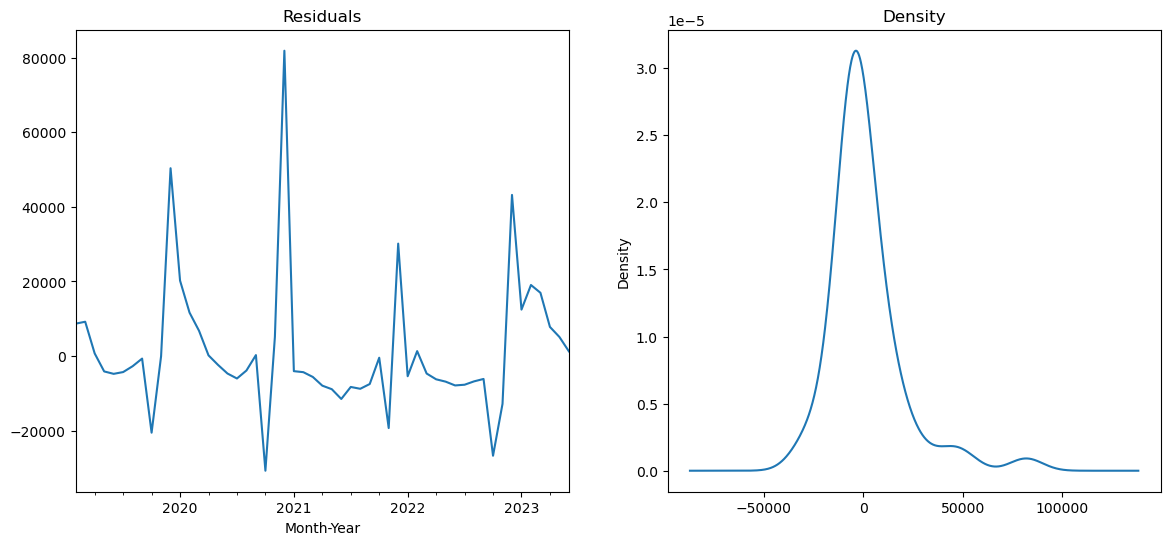

In [24]:
residuals= model_arima.resid[1:]
fig,ax=plt.subplots(1,2, figsize=(14, 6))
residuals.plot(title='Residuals',ax=ax[0])
residuals.plot(title='Density',kind='kde',ax=ax[1])
plt.show()

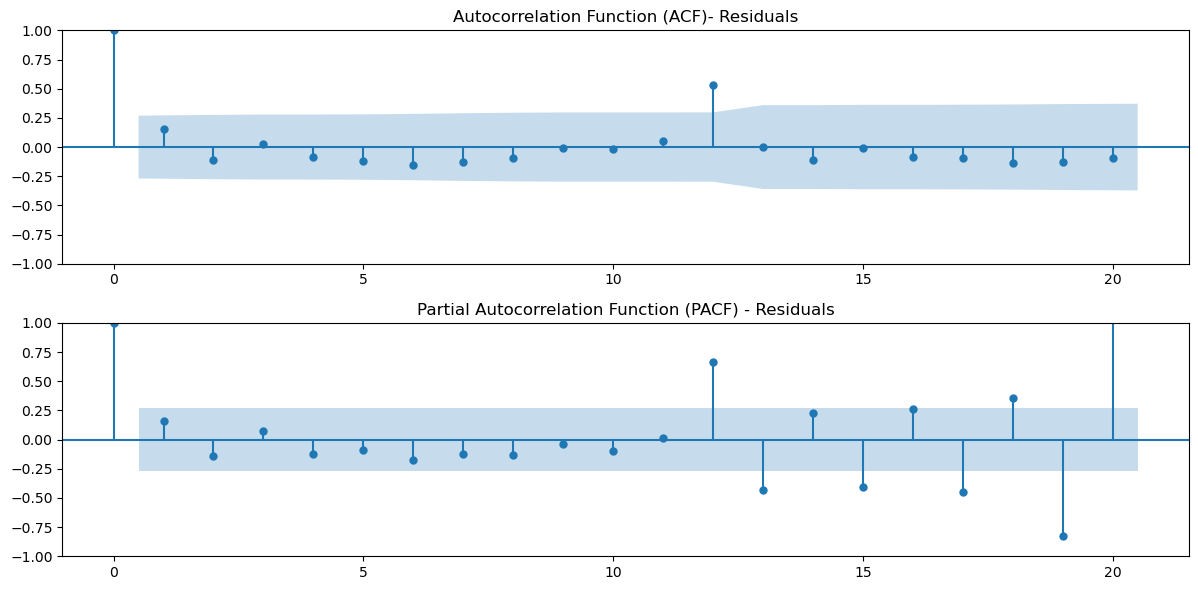

In [25]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(residuals, lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)- Residuals')

plt.subplot(212)
plot_pacf(residuals, lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Residuals')

plt.tight_layout()
plt.show()

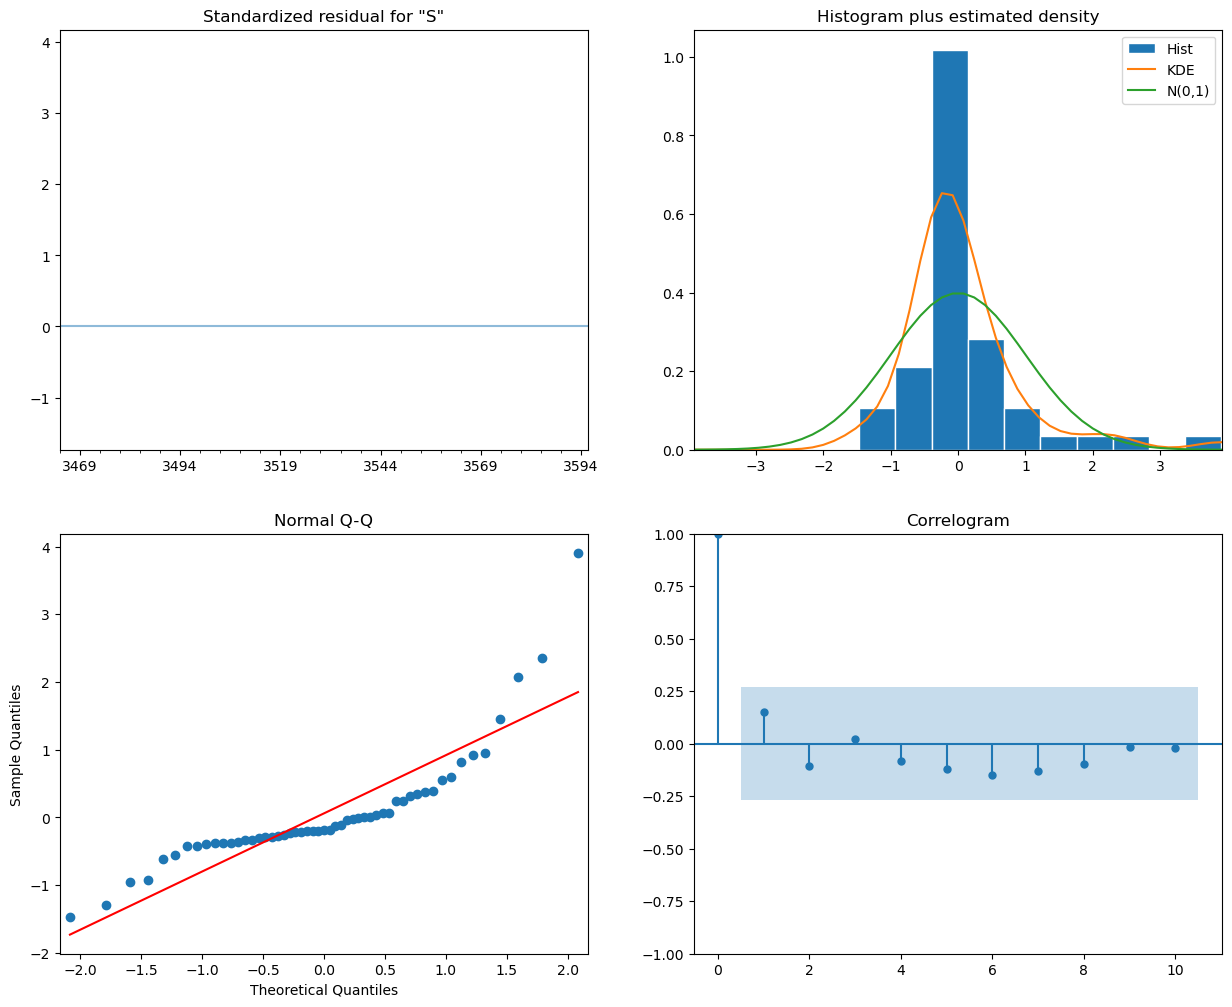

In [26]:
# Create the 4 diagostics plots
model_arima.plot_diagnostics(figsize=(15, 12))
plt.show()

In [27]:
#pred_in_sample = model_arima.get_prediction(start=len(train), end=(len(sales_b)-1))
#sales_b['Forecast_ARIMA_p']=[None]*len(train) + list(pred)

In [28]:
#plt.figure(figsize=(12, 8))
#sns.lineplot(sales_b[['Sales','Forecast_ARIMA_p']])
#plt.title('Product B')
#plt.show()

In [29]:
pred=model_arima.predict(start=len(train), end=(len(sales_h)-1), exog=test[['Market Size','Marketing Expense']], dynamic = True)
sales_h['Forecast_ARIMAX']=[None]*len(train) + list(pred)
#sales_b.plot()

In [30]:
#pred=model_arima.forecast(steps= len(test))
#sales_b['Forecast_ARIMA']=[None]*len(train) + list(pred)
#sales_b.plot()

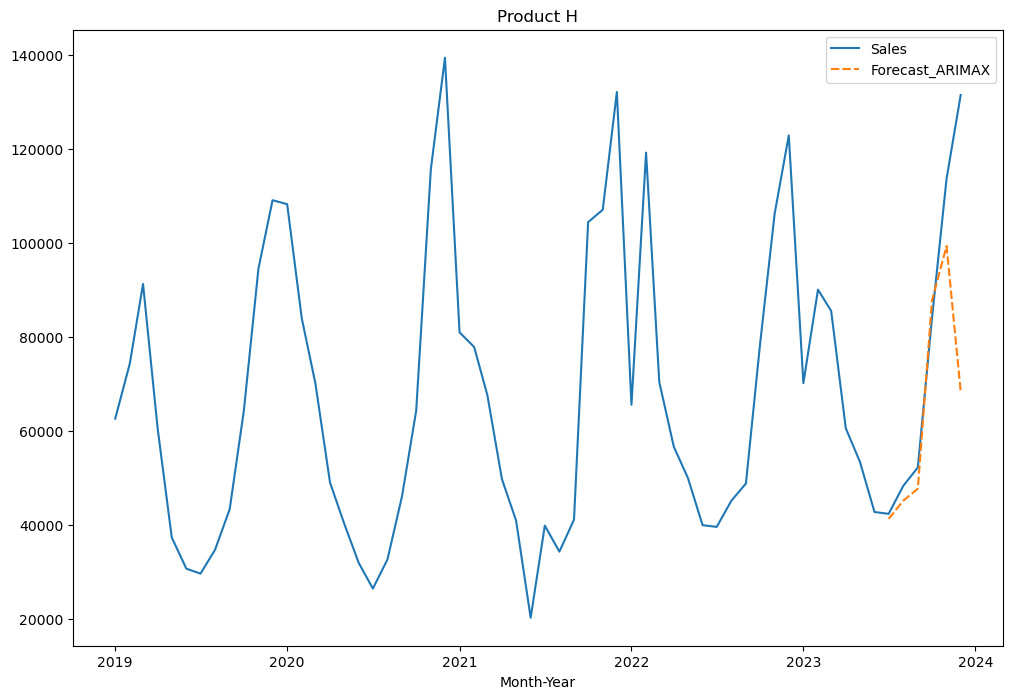

In [31]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_h[['Sales','Forecast_ARIMAX']])
plt.title('Product H')
plt.show()

In [32]:
mae_arimax= mean_absolute_error(test['Sales'],pred)
mse_arimax=mean_squared_error(test['Sales'], pred)
mape_arimax= mean_absolute_percentage_error(test['Sales'],pred)
rmse_arimax= np.sqrt(mean_squared_error(test['Sales'],pred))

print(f'MAE - ARIMAX: {mae_arimax}')
print(f'MAPE - ARIMAX: {mape_arimax}')
print(f'MSE - ARIMAX: {mse_arimax}')
print(f'RMSE - ARIMAX: {rmse_arimax}')

MAE - ARIMAX: 14996.899588489452
MAPE - ARIMAX: 0.13795878623343535
MSE - ARIMAX: 706032454.9640896
RMSE - ARIMAX: 26571.27123349746


# SARIMA

In [33]:
import statsmodels.api as sm

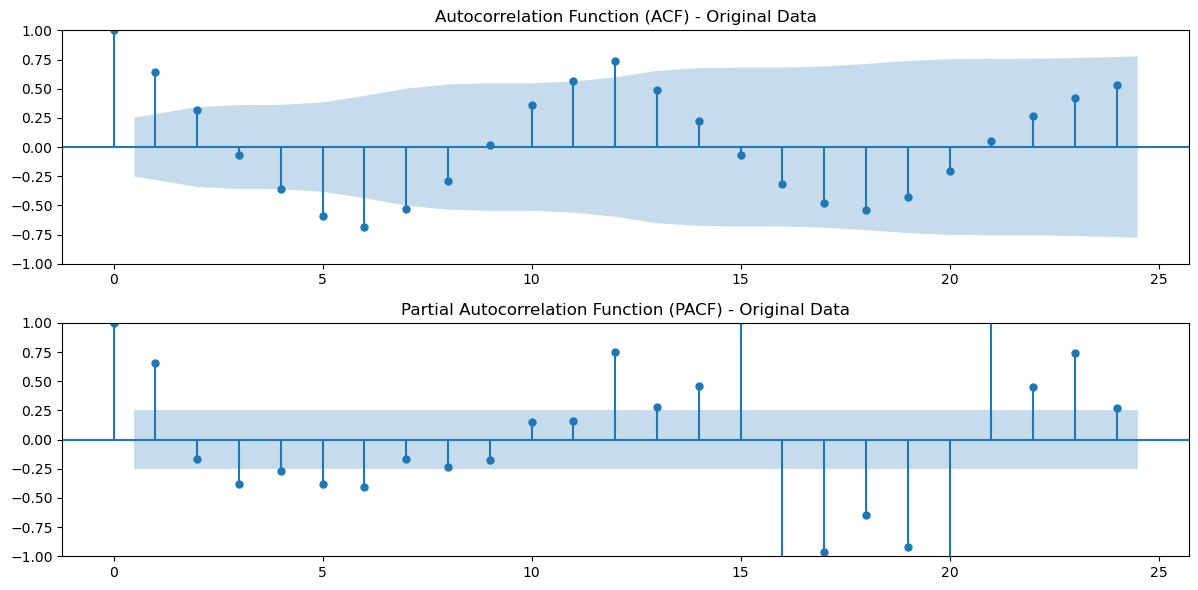

In [34]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(sales_h['Sales'], lags=24, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - Original Data')

plt.subplot(212)
plot_pacf(sales_h['Sales'], lags=24, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Original Data')

plt.tight_layout()
plt.show()

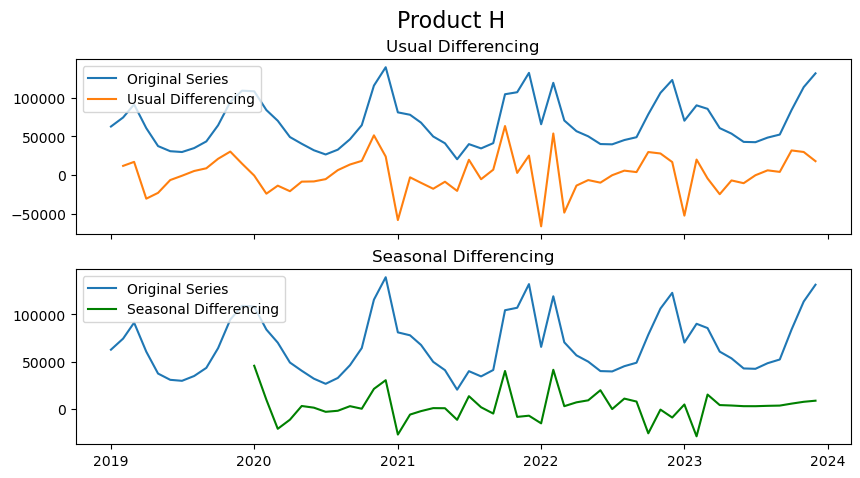

In [35]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(sales_h['Sales'], label='Original Series')
axes[0].plot(sales_h['Sales'].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(sales_h['Sales'], label='Original Series')
axes[1].plot(sales_h['Sales'].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Product H', fontsize=16)
plt.show()

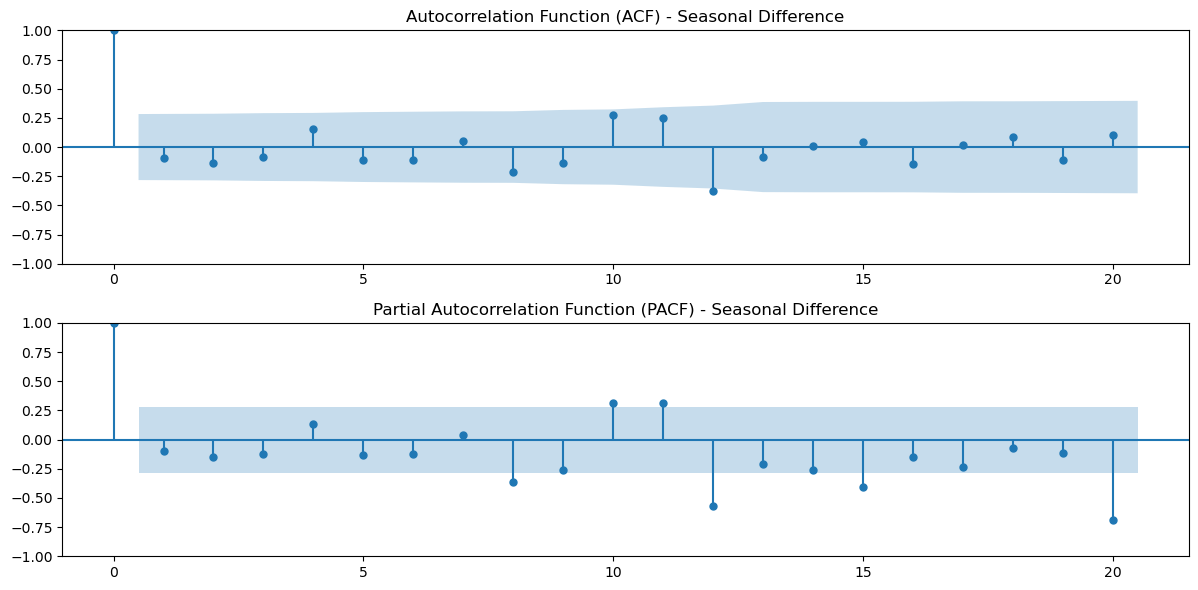

In [36]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(sales_h['Sales'].diff(12).dropna(), lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - Seasonal Difference')

plt.subplot(212)
plot_pacf(sales_h['Sales'].diff(12).dropna(), lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Seasonal Difference')

plt.tight_layout()
plt.show()

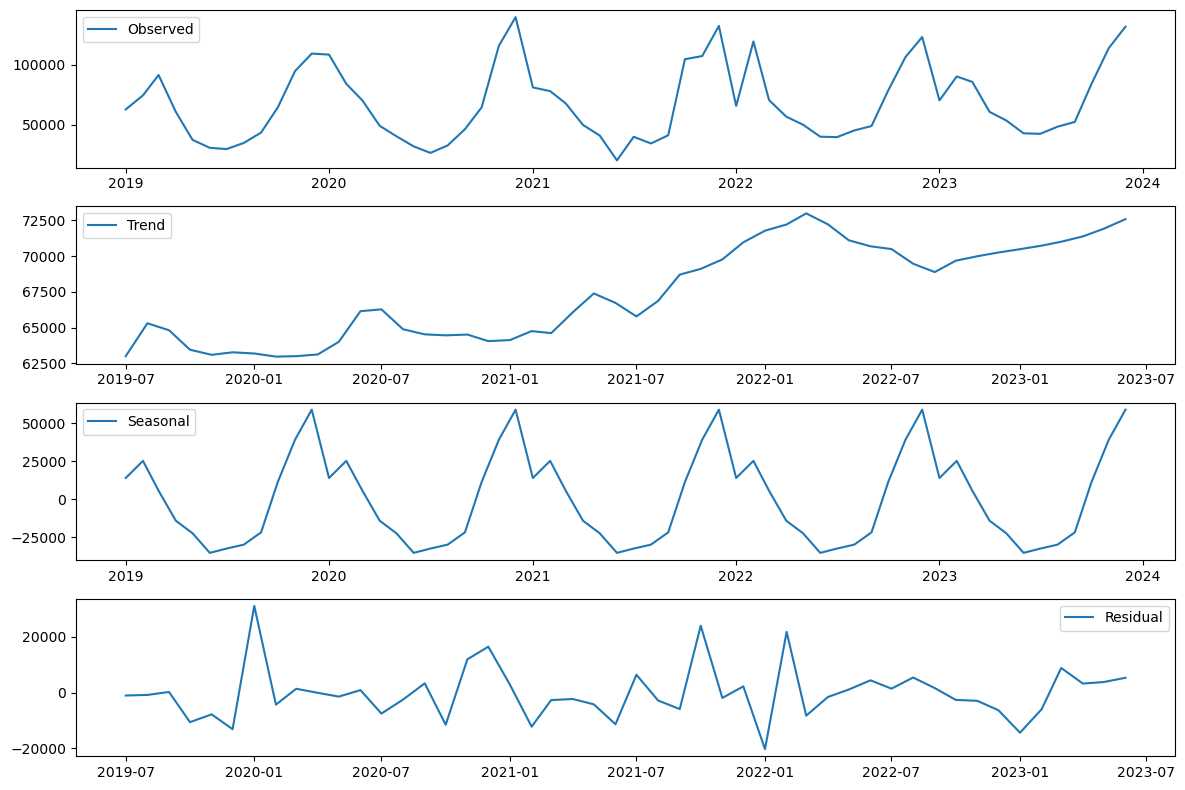

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(sales_h['Sales'], model='additive', period=12)

# Plot the decomposition
#fig = decomposition.plot(figsize=(12,8))
#plt.show()
# Create a new figure with the specified size
plt.figure(figsize=(12, 8))

# Plot each component separately
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend()

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [38]:
order_SARIMAX=[]
# Loop over P order
for P in range(5):
    # Loop over Q order
    for Q in range(2):
        # Fit model
        model_s = sm.tsa.statespace.SARIMAX(train['Sales'], order=(0, 1, 1), seasonal_order=(P, 1, Q, 12),exog=train[['Market Size','Marketing Expense']])
        model_test_s = model_s.fit() 
        pred = model_test_s.predict(start=54, end=59, dynamic=True, exog=test[['Market Size','Marketing Expense']])
        mae = mean_absolute_error(test['Sales'], pred)
        mse = mean_squared_error(test['Sales'], pred)
        # Add order and scores to list        
        order_SARIMAX.append((P, Q, model_test_s.aic, model_test_s.bic, mae, mse))

# Make DataFrame of model order and scores
order_SARIMAX_df = pd.DataFrame(order_SARIMAX, columns=['P', 'Q', 'aic', 'bic', 'mae', 'mse'])


In [39]:
# Sort by AIC
print(order_SARIMAX_df.sort_values('aic'))

   P  Q         aic         bic          mae           mse
4  2  0  908.129292  918.410724  7944.179386  1.334286e+08
6  3  0  910.092176  922.087181  8399.033742  1.444077e+08
5  2  1  910.100233  922.095237  8269.600640  1.414388e+08
1  0  1  911.570254  920.138114  6331.446935  7.392781e+07
8  4  0  912.033168  925.741744  9020.682931  1.565636e+08
7  3  1  912.075258  925.783835  8690.559726  1.507275e+08
3  1  1  912.483633  922.765065  6825.217220  8.737221e+07
9  4  1  914.035423  929.457572  9029.666113  1.567128e+08
0  0  0  914.459290  921.313578  8580.070766  1.163167e+08
2  1  0  915.237914  923.805775  8107.939224  1.092072e+08


In [40]:
sarima=sm.tsa.statespace.SARIMAX(train['Sales'],order=(0, 1, 1),seasonal_order=(2,1,0,12),exog=train[['Market Size','Marketing Expense']])
sarima_model=sarima.fit()
print(sarima_model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                               Sales   No. Observations:                   54
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -448.065
Date:                             Thu, 09 May 2024   AIC                            908.129
Time:                                     18:32:46   BIC                            918.411
Sample:                                 01-01-2019   HQIC                           911.873
                                      - 06-01-2023                                         
Covariance Type:                               opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Market Size           0.5139      0.129      3.976      0.000       0.261       0.767
Market

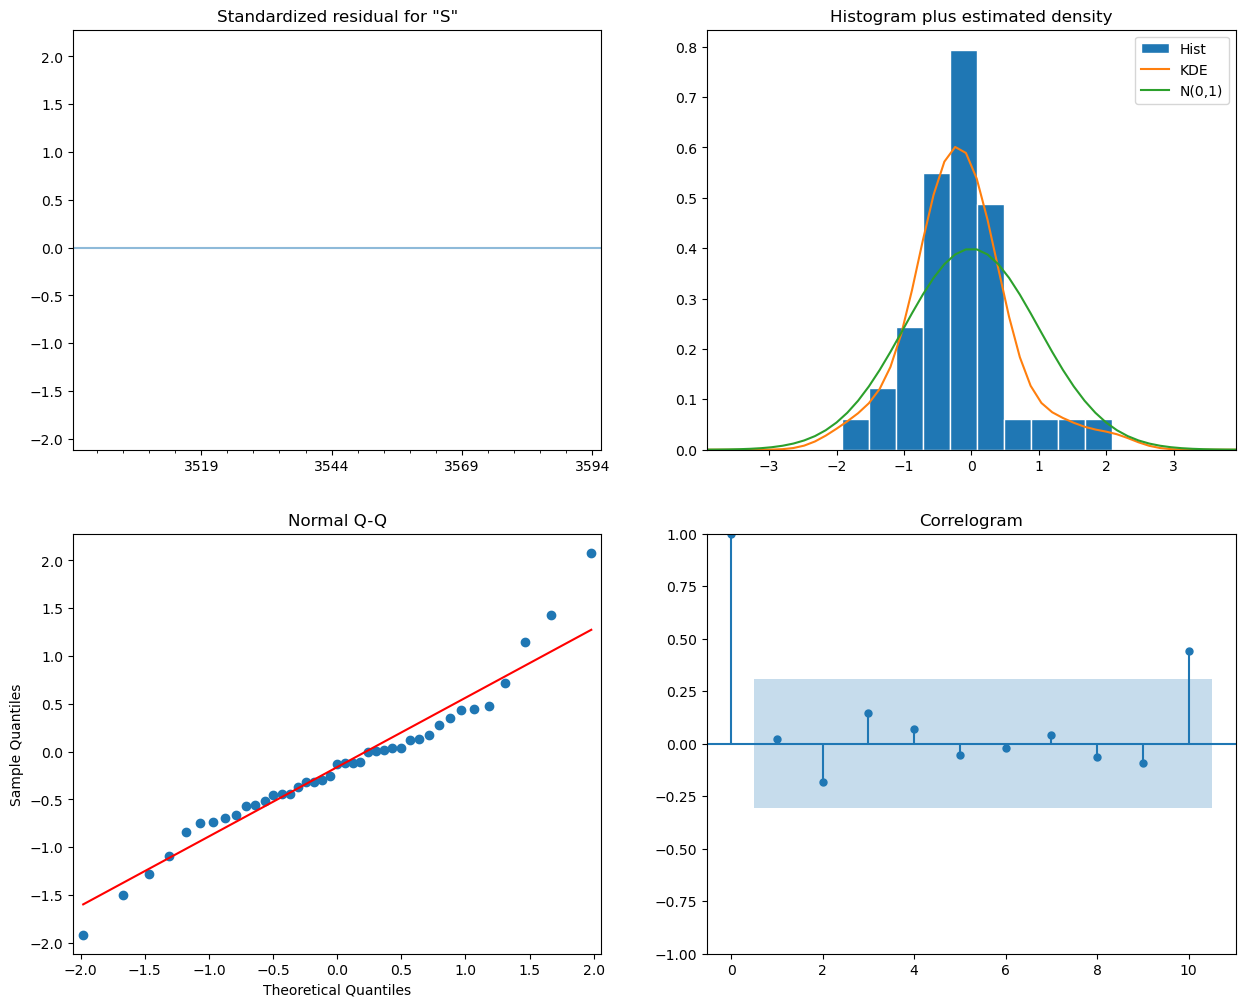

In [41]:
sarima_model.plot_diagnostics(figsize=(15, 12))
plt.show()

In [42]:
forecast_test_sarima=sarima_model.predict(start=54, end=59, dynamic=True, exog=test[['Market Size','Marketing Expense']])

In [43]:
sales_h['Forecast_SARIMAX']=[None]*len(train)+ list(forecast_test_sarima)
#sales_b[['Sales','Forecast_SARIMA']].plot(figsize=(12,8))

Text(0.5, 1.0, 'Product H')

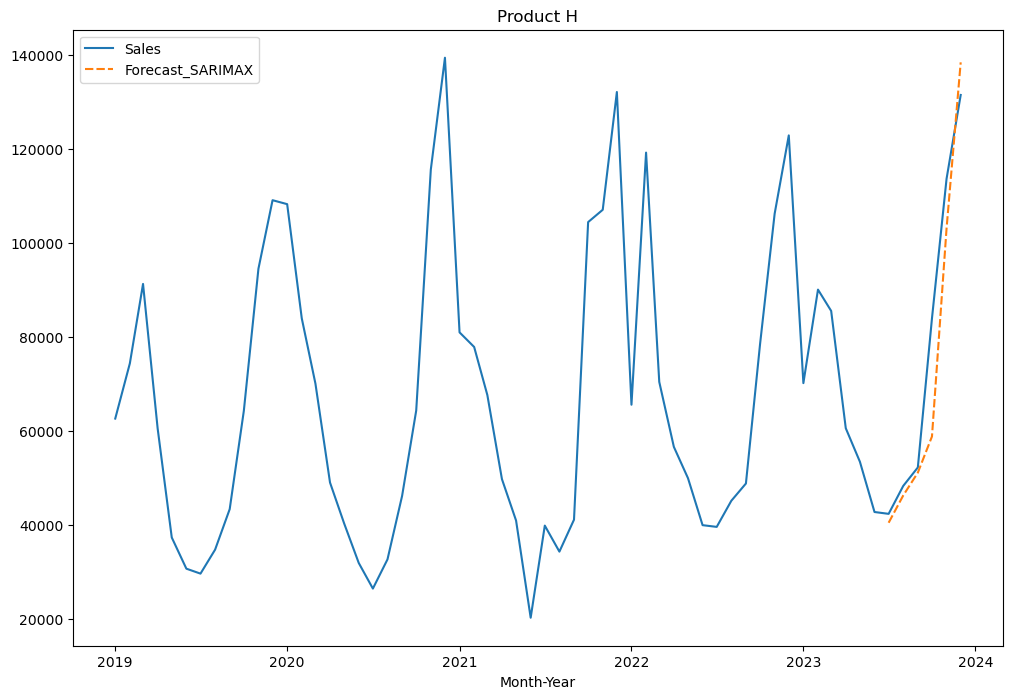

In [44]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_h[['Sales','Forecast_SARIMAX']])
plt.title('Product H')

In [45]:
mae_sarimax= mean_absolute_error(test['Sales'],forecast_test_sarima)
mape_sarimax= mean_absolute_percentage_error(test['Sales'],forecast_test_sarima)
mse_sarimax=mean_squared_error(test['Sales'], forecast_test_sarima)
rmse_sarimax= np.sqrt(mean_squared_error(test['Sales'],forecast_test_sarima))

print(f'MAE - SARIMAX: {round(mae_sarimax,3)}')
print(f'MAPE - SARIMAX: {round(mape_sarimax,3)}')
print(f'MSE - SARIMAX: {round(mse_sarimax,3)}')
print(f'RMSE - SARIMAX: {round(rmse_sarimax,3)}')

MAE - SARIMAX: 7944.179
MAPE - SARIMAX: 0.092
MSE - SARIMAX: 133428628.874
RMSE - SARIMAX: 11551.131


# AUTO-ARIMA

In [46]:
import pmdarima as pm

In [47]:
auto_arima= pm.auto_arima(train['Sales'], start_p=0, d=1, start_q=0, max_p=6,max_q=2,
                          start_P=0, D=1, start_Q=0, max_P=6 ,max_Q=2 ,  
                          stepwise=False, trace=True,
                          seasonal=True,m=12, exogenous=train[['Market Size','Marketing Expense']])
auto_arima

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=945.612, Time=0.03 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=943.128, Time=0.28 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=942.959, Time=0.31 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=945.183, Time=0.07 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.39 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=944.769, Time=0.40 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=945.333, Time=0.26 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=0.94 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=946.355, Time=0.79 sec
 ARIMA(0,1,0)(3,1,0)[12]             : AIC=944.152, Time=5.79 sec
 ARIMA(0,1,0)(3,1,1)[12]             : AIC=inf, Time=9.94 sec
 ARIMA(0,1,0)(3,1,2)[12]             : AIC=948.284, Time=5.64 sec
 ARIMA(0,1,0)(4,1,0)[12]             : AIC=946.633, Time=2.28 sec
 ARIMA(0,1,0)(4,1,1)[12]             : AIC=948.424, Time=5.35 sec
 ARIMA(0,1,0)(5,1,0)[12]             : AIC=948.633, Time=5.77 sec
 ARIMA(0,1,1)(0,1,0)[1

ARIMA(order=(1, 1, 0), scoring_args={}, seasonal_order=(0, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

In [48]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                   54
Model:             SARIMAX(1, 1, 0)x(0, 1, [1, 2], 12)   Log Likelihood                -465.548
Date:                                 Thu, 09 May 2024   AIC                            939.096
Time:                                         18:35:57   BIC                            945.950
Sample:                                     01-01-2019   HQIC                           941.592
                                          - 06-01-2023                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3218      0.124     -2.595      0.009      -0.565      -0.079
ma.S.L12      -0.3219      0.182     -1.770      0.077      -0.678       0.034
ma.S.L24      -0.2980      0.136     -2.194      0.028      -0.564      -0.032
sigma2      4.234e+08   1.66e-10   2.55e+18      0.000    4.23e+08    4.23e+08
===================================================================================
Ljung-Box (L1) (Q):                   1.15   Jarque-Bera (JB):                 1.18
Prob(Q):                              0.28   Prob(JB):                         0.55
Heteroskedasticity (H):               0.29   Skew:                            -0.06
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.56e+34. Standard errors may be unstable.
"""

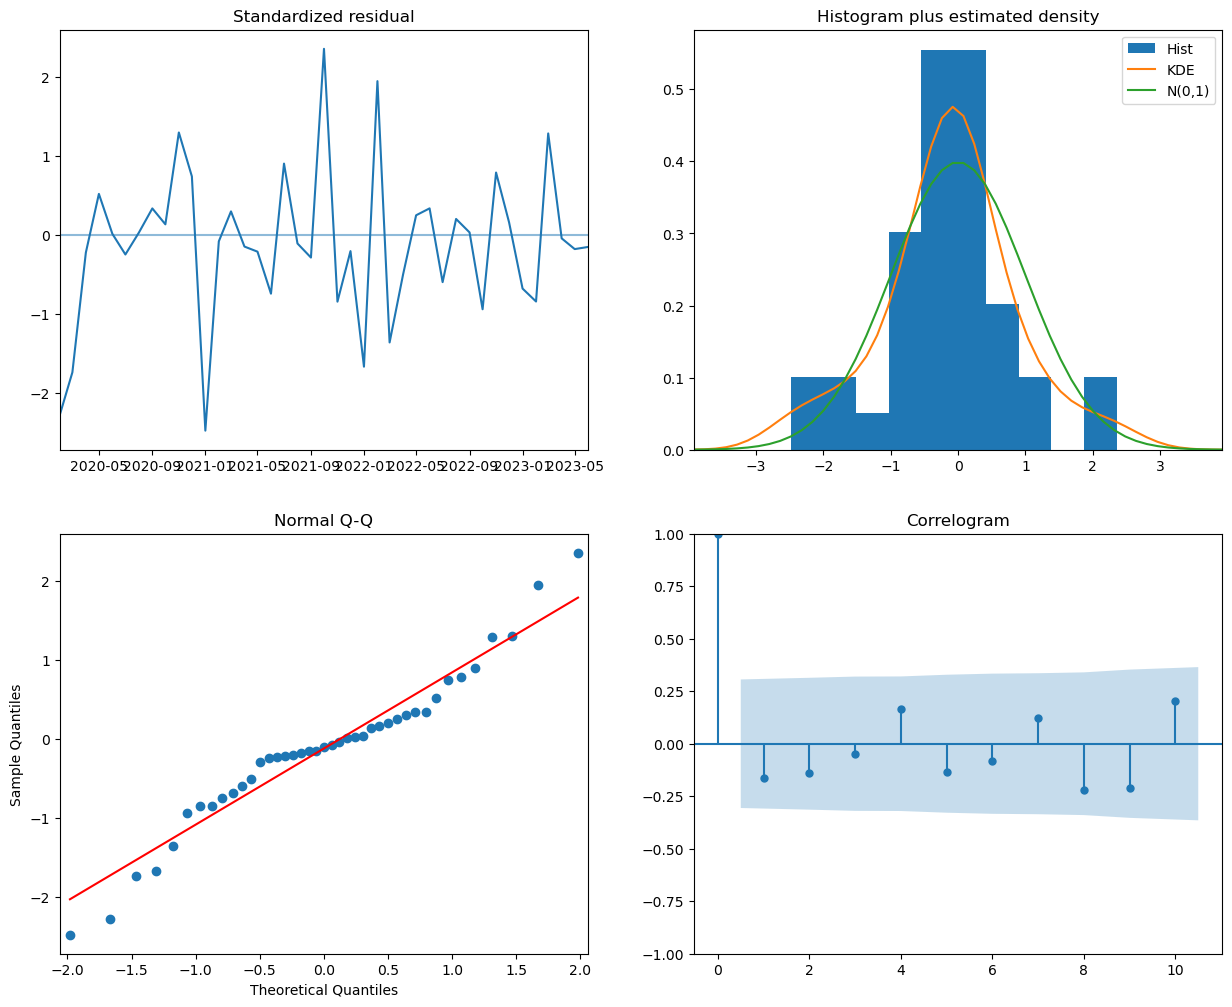

In [49]:
auto_arima.plot_diagnostics(figsize=(15, 12))
plt.show()

In [50]:
forecast_test_auto= auto_arima.predict(n_periods=len(test), exogenous=test[['Market Size','Marketing Expense']])
sales_h['Forecast_AUTO ARIMAX']=[None]*len(train)+ list(forecast_test_auto)
#sales_b[['Sales','Forecast_AUTO ARIMA']].plot()

Text(0.5, 1.0, 'Product H')

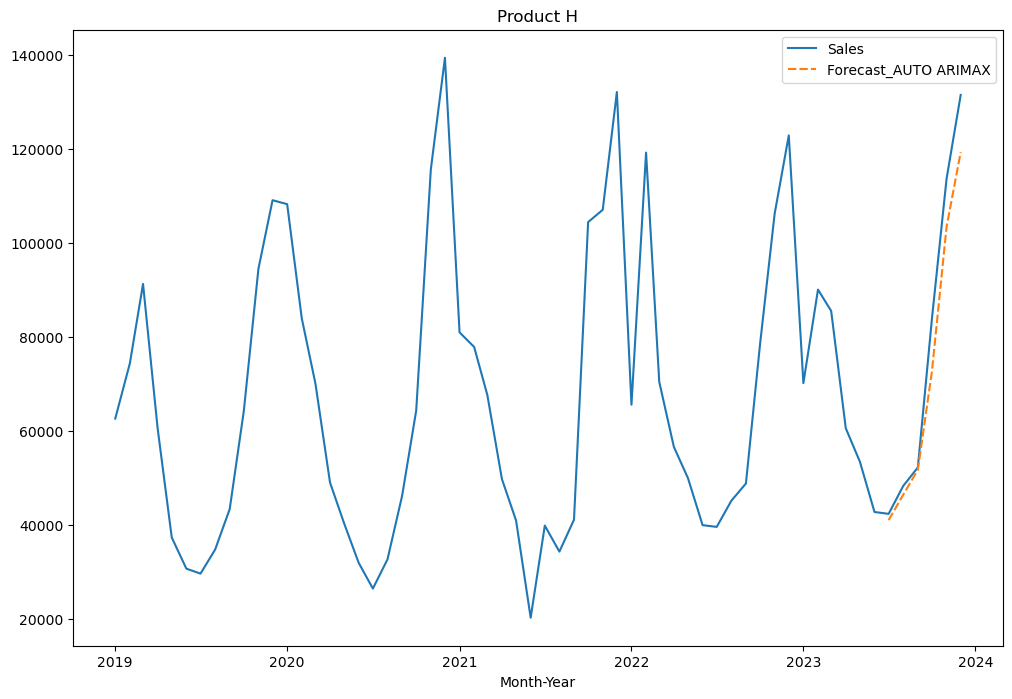

In [51]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_h[['Sales','Forecast_AUTO ARIMAX']])
plt.title('Product H')

In [52]:
mae_auto_arimax= mean_absolute_error(test['Sales'],forecast_test_auto)
mape_auto_arimax= mean_absolute_percentage_error(test['Sales'],forecast_test_auto)
mse_auto_arimax=mean_squared_error(test['Sales'],forecast_test_auto)
rmse_auto_arimax= np.sqrt(mean_squared_error(test['Sales'],forecast_test_auto))

print(f'MAE - AUTO ARIMAX: {mae_auto_arimax}')
print(f'MAPE - AUTO ARIMAX: {mape_auto_arimax}')
print(f'MSE - AUTO ARIMAX: {mse_auto_arimax}')
print(f'RMSE - AUTO ARIMAX: {rmse_auto_arimax}')

MAE - AUTO ARIMAX: 6228.513241184669
MAPE - AUTO ARIMAX: 0.06603875685360495
MSE - AUTO ARIMAX: 64177018.37911668
RMSE - AUTO ARIMAX: 8011.056008986373


In [53]:
sales_h.tail(12)

,Sales,Market Size,Marketing Expense,Forecast_ARIMAX,Forecast_SARIMAX,Forecast_AUTO ARIMAX
Month-Year,,,,,,
2023-01-01,70232,113254,267739,NaN,NaN,NaN
2023-02-01,90139,145361,343629,NaN,NaN,NaN
2023-03-01,85600,138040,326326,NaN,NaN,NaN
2023-04-01,60633,97775,231146,NaN,NaN,NaN
2023-05-01,53500,86276,203954,NaN,NaN,NaN
2023-06-01,42800,69017,163163,NaN,NaN,NaN
2023-07-01,42408,68386,161668,41329.576636,40513.251336,41069.755422
2023-08-01,48352,77974,184328,45203.799125,46324.236328,46487.056796
2023-09-01,52288,84321,199333,47768.123297,51179.935477,51781.077194


In [54]:
sales_h.mean()

Sales                    67632.216667
Market Size             119060.516667
Marketing Expense       214030.000000
Forecast_ARIMAX          64995.709078
Forecast_SARIMAX         73099.366834
Forecast_AUTO ARIMAX     72501.486759
dtype: float64

In [55]:
data = {
    'model': ['ARIMAX', 'AUTO ARIMAX', 'SEASONAL ARIMAX'],
    'MAE': [mae_arimax, mae_auto_arimax, mae_sarimax],  
    'MAPE': [mape_arimax, mape_auto_arimax, mape_sarimax],  
    'MSE': [mse_arimax, mse_auto_arimax, mse_sarimax],  
    'RMSE': [rmse_arimax, rmse_auto_arimax, rmse_sarimax]  
}

model_results = pd.DataFrame(data)
model_results.set_index('model', inplace=True)
model_results

,MAE,MAPE,MSE,RMSE
model,,,,
ARIMAX,14996.899588,0.137959,7.060325e+08,26571.271233
AUTO ARIMAX,6228.513241,0.066039,6.417702e+07,8011.056009
SEASONAL ARIMAX,7944.179386,0.092096,1.334286e+08,11551.131065


# TESTING

In [20]:
auto_arima_1= pm.auto_arima(train['Sales'], start_p=0, start_q=0, max_p=6,max_q=2,
                          start_P=0, start_Q=0, max_P=2 ,max_Q=2 ,  
                          stepwise=False, trace=True,
                          seasonal=True,m=12, exogenous=train[['Market Size','Marketing Expense']])
auto_arima_1

 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=938.341, Time=0.04 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=940.339, Time=0.06 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=941.129, Time=0.28 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=940.339, Time=0.08 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=942.005, Time=0.26 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=941.251, Time=0.23 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=0.78 sec
 ARIMA(0,0,0)(2,1,2)[12] intercept   : AIC=942.531, Time=1.67 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=939.281, Time=0.06 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=941.224, Time=0.23 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=942.009, Time=0.37 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=941.235, Time=0.16 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=0.95 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=1.37 sec
 ARIMA(0,0,1)(2,1,0)[12] i

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(0, 1, 0, 12),
      suppress_warnings=True)

In [21]:
auto_arima_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                        y   No. Observations:                   54
Model:             SARIMAX(0, 1, 0, 12)   Log Likelihood                -467.170
Date:                  Wed, 08 May 2024   AIC                            938.341
Time:                          20:00:38   BIC                            941.816
Sample:                      01-01-2019   HQIC                           939.615
                           - 06-01-2023                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2649.1190   2717.640      0.975      0.330   -2677.357    7975.595
sigma2      2.685e+08   5.31e+07      5.055      0.000    1.64e+08    3.73e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.47   Jarque-Bera (JB):                 3.80
Prob(Q):                              0.49   Prob(JB):                         0.15
Heteroskedasticity (H):               0.54   Skew:                             0.61
Prob(H) (two-sided):                  0.26   Kurtosis:                         3.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
forecast_test_auto_1= auto_arima_1.predict(n_periods=len(test), exogenous=test[['Market Size','Marketing Expense']])
sales_h['Forecast_AUTO ARIMA_1']=[None]*len(train)+ list(forecast_test_auto_1)

Text(0.5, 1.0, 'Product H')

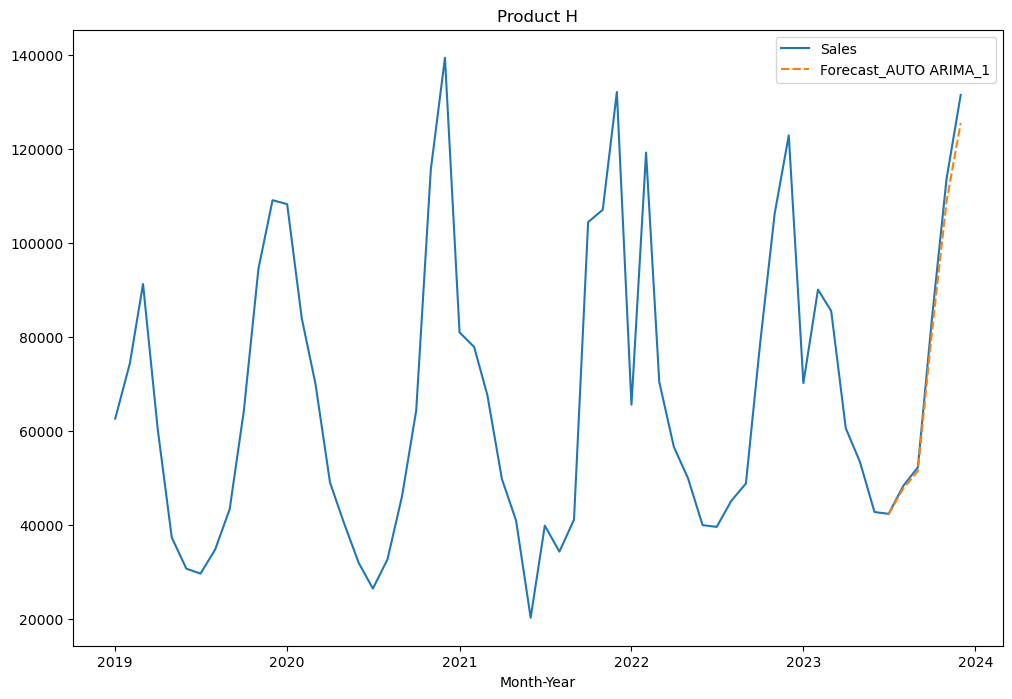

In [23]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_h[['Sales','Forecast_AUTO ARIMA_1']])
plt.title('Product H')

In [24]:
mae_auto_arima_1= mean_absolute_error(test['Sales'],forecast_test_auto_1)
mape_auto_arima_1= mean_absolute_percentage_error(test['Sales'],forecast_test_auto_1)
mse_auto_arima_1=mean_squared_error(test['Sales'],forecast_test_auto_1)
rmse_auto_arima_1= np.sqrt(mean_squared_error(test['Sales'],forecast_test_auto_1))

print(f'MAE - AUTO ARIMA: {mae_auto_arima_1}')
print(f'MAPE - AUTO ARIMA: {mape_auto_arima_1}')
print(f'MSE - AUTO ARIMA: {mse_auto_arima_1}')
print(f'RMSE - AUTO ARIMA: {rmse_auto_arima_1}')

MAE - AUTO ARIMA: 2501.547619047617
MAPE - AUTO ARIMA: 0.024942424893195328
MSE - AUTO ARIMA: 11242498.045918344
RMSE - AUTO ARIMA: 3352.9834544653427
